# Ng1990.ipynb
This notebook demonstrates the use of the `swapy` package to reproduce wakefield results for a cylindrical dielectric-lined waveguide as presented in Ng, 1990.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from swapy.structures import Cylinder

## Define waveguide properties
First we'll define the geometric and physical waveguide parameters used in Ng 1990:

In [2]:
# Define geometric parameters
a = 0.1
n_xi = 100
Xi = np.linspace(1.e-3, 1., n_xi, endpoint=False)

# Define physical parameters
mu = 1.0
eps = np.array([1.2, 2.0, 3.0, 4.0])
n_eps = len(eps)

## Perform modal calculations
Looping over electrical permittivities $\epsilon$ and aspect ratios $\xi$, we'll use the `Cylinder` class to construct corresponding waveguides and compute modal quantities:

In [3]:
#
x01 = np.zeros((n_eps, n_xi))
x11 = np.zeros((n_eps, n_xi))
Fz01 = np.zeros((n_eps, n_xi))
Fr11 = np.zeros((n_eps, n_xi))

# Loop over epsilon & xi
for e in range(n_eps):
    epsilon = eps[e]
    for n in range(n_xi):
        b = Xi[n] * a

        # Construct cylindrical waveguide & compute modal quantities
        cyl = Cylinder(a, b, mu, epsilon)
        G01, _, x01[e,n] = cyl.get_modes(0, 1)
        G11, _, x11[e,n] = cyl.get_modes(1, 1)

        # Compute wake forces from Green's function amplitudes (Ng, Eqns. 5.2 & 5.4)
        Fz01[e, n] = 4. * G01 / (epsilon * Xi[n])
        Fr11[e, n] = 8. * np.sqrt(mu * epsilon - 1.) / Xi[n]**2  * (G11 / x11[e,n]) 

## Plot results
Finally, we'll reproduce the six figures from Ng 1990:

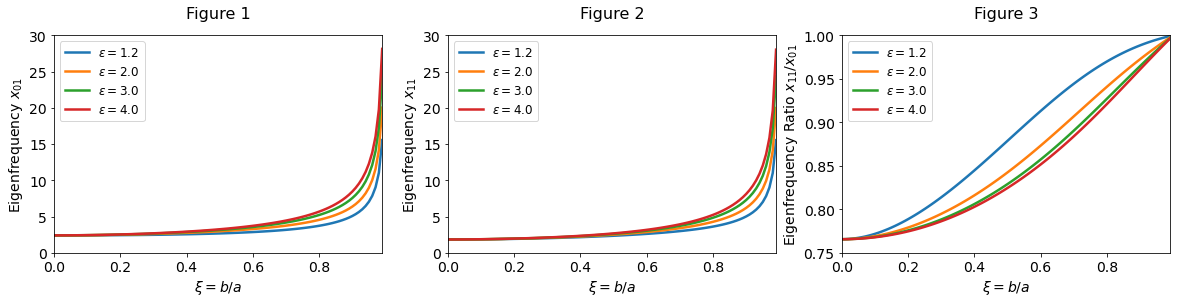

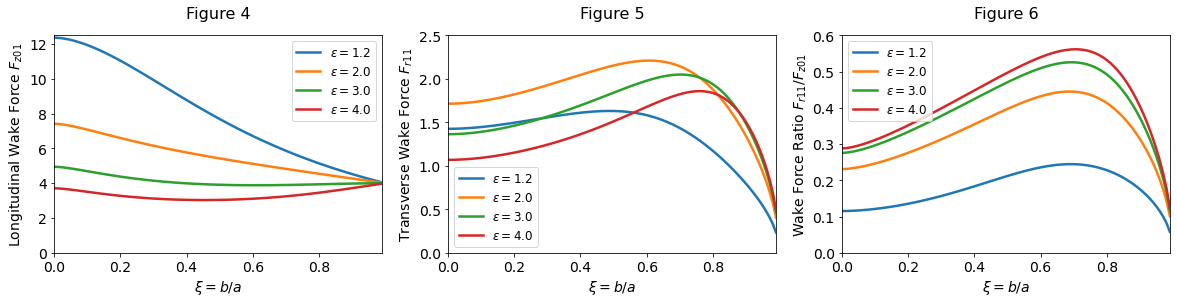

In [4]:
# Plot Figures 1-3 for the lowest reduced eigenfrequencies given m = (0,1)
fig, axs = plt.subplots(1, 3, figsize=(20,4))
for i in range(3):
    axs[i].set_title("Figure {:d}".format(i+1), fontsize=16, y=1.05)
for e in range(n_eps):
    axs[0].plot(Xi, x01[e], lw=2.5, label=r"$\epsilon={:.1f}$".format(eps[e]))
    axs[1].plot(Xi, x11[e], lw=2.5, label=r"$\epsilon={:.1f}$".format(eps[e]))
    axs[2].plot(Xi, (x11/x01)[e], lw=2.5, label=r"$\epsilon={:.1f}$".format(eps[e]))
for ax in axs:
    ax.legend(loc='upper left', fontsize=12)
    ax.set_xlabel(r"$\xi = b / a$", fontsize=14)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel(r"Eigenfrequency $x_{01}$", fontsize=14)
axs[1].set_ylabel(r"Eigenfrequency $x_{11}$", fontsize=14)
axs[2].set_ylabel(r"Eigenfrequency Ratio $x_{11}/x_{01}$", fontsize=14)
axs[0].axis([0., Xi.max(), 0., 30.])
axs[1].axis([0., Xi.max(), 0., 30.])
axs[2].axis([0., Xi.max(), .75, 1])

# Plot Figures 4-6 for the longitudinal & transverse wake forces of the lowest mode given m = (0,1)
fig, axs = plt.subplots(1, 3, figsize=(20,4))
for i in range(3):
    axs[i].set_title("Figure {:d}".format(i+4), fontsize=16, y=1.05)
for e in range(n_eps):
    axs[0].plot(Xi, Fz01[e], lw=2.5, label=r"$\epsilon={:.1f}$".format(eps[e]))
    axs[1].plot(Xi, Fr11[e], lw=2.5, label=r"$\epsilon={:.1f}$".format(eps[e]))
    axs[2].plot(Xi, (Fr11/Fz01)[e], lw=2.5, label=r"$\epsilon={:.1f}$".format(eps[e]))
for ax in axs:
    ax.set_xlabel(r"$\xi = b / a$", fontsize=14)
    ax.tick_params(labelsize=14)
axs[0].set_ylabel(r"Longitudinal Wake Force $F_{z01}$", fontsize=14)
axs[1].set_ylabel(r"Transverse Wake Force $F_{r11}$", fontsize=14)
axs[2].set_ylabel(r"Wake Force Ratio $F_{r11}/F_{z01}$", fontsize=14)
axs[0].legend(loc='upper right', fontsize=12)
axs[1].legend(loc='lower left', fontsize=12)
axs[2].legend(loc='upper left', fontsize=12)
axs[0].axis([0., Xi.max(), 0., 12.5])
axs[1].axis([0., Xi.max(), 0., 2.5])
axs[2].axis([0., Xi.max(), 0., .6]);